USED PACKAGES

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv('courses.csv', index_col=0)
#print(df)

has_nulls = df.isnull().any()
print(has_nulls)


Course_Name            False
Category               False
Duration (hours)       False
Enrolled_Students      False
Completion_Rate (%)    False
Platform               False
Price ($)              False
Rating (out of 5)      False
dtype: bool


looking if there are any duplicates based on the name of the course

In [23]:
course_counts = df['Course_Name'].value_counts()

duplicates = course_counts[course_counts > 1]
print(duplicates)

Series([], Name: count, dtype: int64)


looking for outliers on each numerical column;
a value is an outlier if its value is lower than q1-1.5*iqr or higher than q3+1.5*iqr

In [19]:
outliers_dict = {}

# Loop through each column in the DataFrame
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    
    # Store outliers for each column in the dictionary
    outliers_dict[column] = outliers

# Print outliers for each column
for col, outliers in outliers_dict.items():
    print(f"Outliers for {col}:\n{outliers}\n")

Outliers for Duration (hours):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Enrolled_Students:
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Completion_Rate (%):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Price ($):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Rating (out of 5):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []



bpx plot for every numerical data for a better visualisation

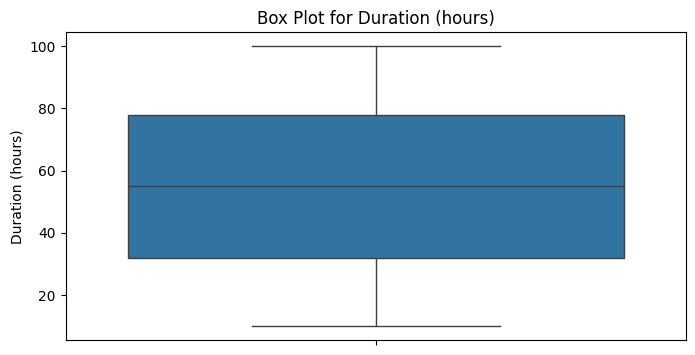

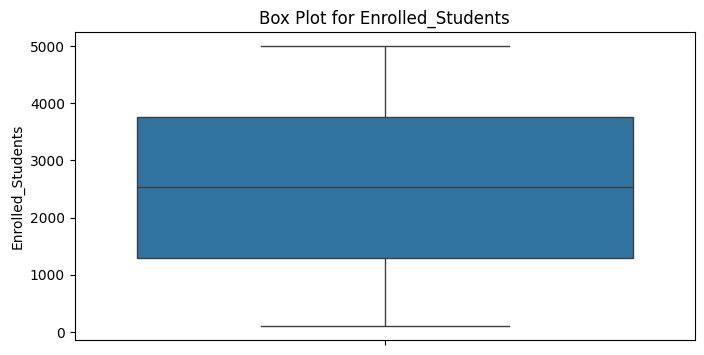

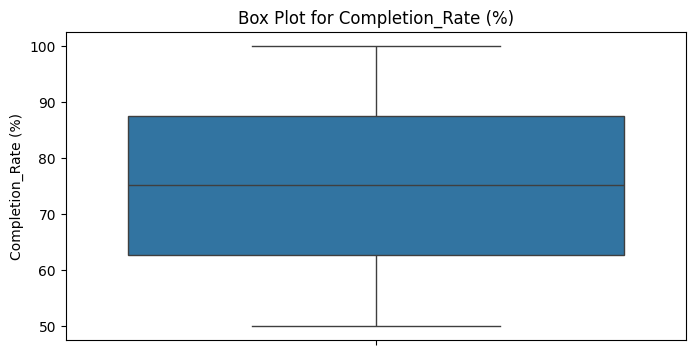

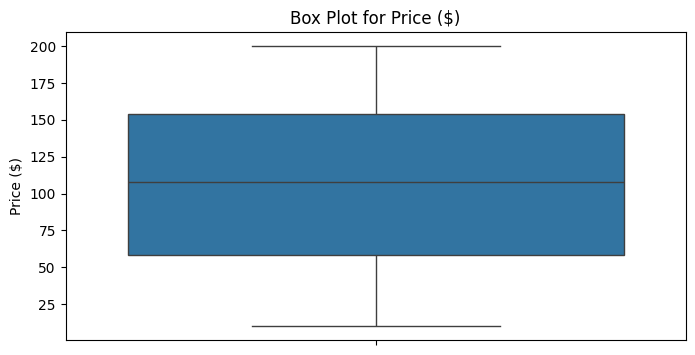

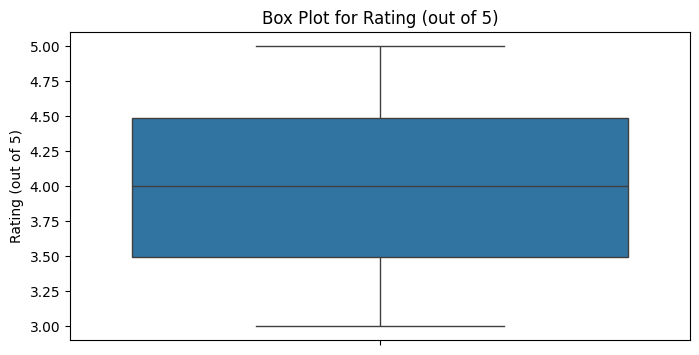

In [21]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[column])  
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()